In [84]:
import pandas as pd
import numpy as np

#imports data from the attached AAPL csv file with historical prices
data = pd.read_csv("AAPL.csv")
data = data['Open']
print(len(data))

#Selects only a certain range of data
#entire data would give high bias towards bull market
data = data[2400:]
print(data.tail())


3019
3014    174.68
3015    170.80
3016    170.10
3017    171.00
3018    170.52
Name: Open, dtype: float64


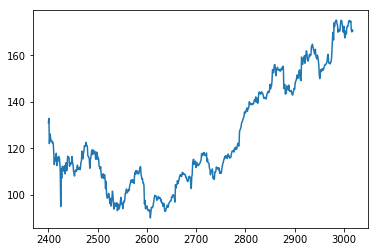

In [85]:
import matplotlib.pyplot as plt

plt.plot(data)
plt.show()
dataList = data.tolist()

#determines the daily changes in percent, helps establish the random change generator
dataChange = []
for x in range(len(dataList) -1):
    dataChange.append(dataList[x+1] - dataList[x])

#Converts to numpy array for RNG calculations
dataNP = np.asarray(dataChange)
dataSTD = dataNP.std()
dataMean = dataNP.mean()


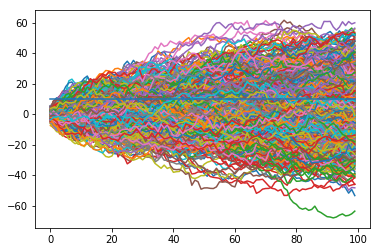

In [88]:
#Forecast the % change in the stock over a certain interval
def foreCast(days, mean, std):
    changeArray = []
    changeVal = 0
    for x in range(days):
        changeVal += np.random.normal(mean, std, 1)[0]
        changeArray.append(changeVal)
    
    return changeArray

mainForecast = []
#Number of forecasts
foreCastCount = 1000
#Number of days into the future
dayCount = 100

#option Val is the % difference between the current price
optionVal = 10
optionArray = []
for x in range(dayCount):
    optionArray.append(optionVal)

for x in range(foreCastCount):
    mainForecast.append(foreCast(dayCount, dataMean, dataSTD))

for x in range(foreCastCount):
    plt.plot(mainForecast[x])
    
plt.plot(optionArray)

plt.show()


In [89]:
#Determines the number of MC simulations that are above the option price
aboveCount = 0
for x in range(len(mainForecast)):
    if(optionVal < mainForecast[x][-1]):
        aboveCount += 1

abovePercent = aboveCount / foreCastCount
print("There is a " + str(abovePercent) + " change that the value exceeds the option in " + str(dayCount) + " days")

There is a 0.437 change that the value exceeds the option in 100 days
